<a href="https://colab.research.google.com/github/mannmoshe/image-processing/blob/main/project/image_processing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_ClearObstacle.zip?raw=true

--2023-01-25 14:52:52--  https://github.com/mannmoshe/image-processing/blob/main/project/FlickerLine_75Hz_ClearObstacle.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_ClearObstacle.zip [following]
--2023-01-25 14:52:52--  https://github.com/mannmoshe/image-processing/raw/main/project/FlickerLine_75Hz_ClearObstacle.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_ClearObstacle.zip [following]
--2023-01-25 14:52:52--  https://raw.githubusercontent.com/mannmoshe/image-processing/main/project/FlickerLine_75Hz_ClearObstacle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.

In [2]:
!unzip /content/FlickerLine_75Hz_ClearObstacle.zip?raw\=true

Archive:  /content/FlickerLine_75Hz_ClearObstacle.zip?raw=true
  inflating: FlickerLine_75Hz_Clear.csv  
  inflating: FlickerLine_75Hz_Obstacle.csv  


In [50]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

In [27]:
meta_data = pd.read_csv('FlickerLine_75Hz_Clear.csv', nrows=0)
meta_data

,# Input: DVXplorer_DXM00137 sizeX: 640 sizeY: 480


In [28]:
sizeX = int(re.search('sizeX: (.*) sizeY', meta_data.columns[0]).group(1))
sizeY = int(re.search('sizeY: (.*)', meta_data.columns[0]).group(1))
print(sizeX, sizeY)

640 480


In [29]:
df = pd.read_csv('FlickerLine_75Hz_Clear.csv', skiprows=1)

In [32]:
df.head()

,timestamp,x,y,polarity
0,1673364248010552,30,174,0
243,1673364248010552,228,189,0
242,1673364248010552,227,185,0
241,1673364248010552,227,181,0
240,1673364248010552,226,190,0


In [39]:
df.shape

(4411868, 4)

In [31]:
df.sort_values('timestamp', inplace=True)

In [33]:
def get_tempo(g):
    g['diff'] = g['polarity'] - g['polarity'].shift(1)
    uplines = g[(g['diff'] == 1)]
    tempos = uplines["timestamp"].shift(-1) - uplines["timestamp"]
    return 1e06/tempos.mean()

In [34]:
good_dots = df.groupby(by=['x','y']).filter(lambda group: 74 <= get_tempo(group) <= 76)

In [35]:
good_dots.head()

,timestamp,x,y,polarity
242,1673364248010552,227,185,0
241,1673364248010552,227,181,0
240,1673364248010552,226,190,0
238,1673364248010552,224,192,0
236,1673364248010552,223,193,0


In [38]:
good_dots.shape

(4046201, 4)

In [80]:
line_dots = list(set(zip(good_dots.x, good_dots.y)))

In [81]:
len(line_dots)

3136

In [82]:
data = np.zeros((480,640), dtype=np.uint8)

In [84]:
for d in line_dots:
  data[d[1],d[0]] = 1

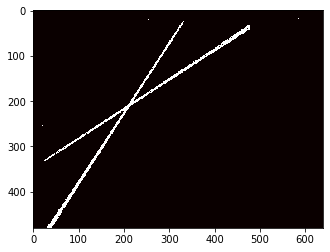

In [85]:
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()